In [ ]:
!pip install numpy-financial

# Funciones

In [ ]:
import numpy_financial as npf
import math
import pandas as pd  # Para mostrar la tabla
import matplotlib.pyplot as plt  # Para graficar



tasa_descuento = 0.05 #5 % de C.O
tasa_descuento2 = 0.08 #8 % de C.O


def calcular_vpn(flujo_inicial, flujos, tasa_descuento):
    vpn_flujos_futuros = 0

    # Calcular el VPN de los flujos futuros
    for t in range(1, len(flujos)):
        valor_presente = flujos[t] / (1 + tasa_descuento) ** t
        vpn_flujos_futuros += valor_presente

    # Sumamos el flujo inicial
    vpn_total = flujo_inicial + vpn_flujos_futuros

    return vpn_total



def calcular_nper(PV, PMT, rate, FV=0):
    if rate == 0:
        return PV / PMT  # Caso especial sin tasa de interés

    try:
        denominador = PMT + rate * PV
        if denominador <= 0:
            return None  # Evita divisiones inválidas
        NPER = math.log((PMT - rate * FV) / denominador) / math.log(1 + rate)

        return NPER
    except (ValueError, ZeroDivisionError):
        return None  # Manejo de errores matemáticos


In [ ]:
def calcular_nper(PV, PMT, rate, FV=0):
    if rate == 0:
        return PV / PMT  # Caso especial sin tasa de interés

    try:
        denominador = PMT + rate * PV
        if denominador <= 0:
            return None  # Evita divisiones inválidas
        NPER = math.log((PMT - rate * FV) / denominador) / math.log(1 + rate)
        return NPER
    except (ValueError, ZeroDivisionError):
        return None  # Manejo de errores matemáticos


#Ind1


Resultados guardados en 'resultados_Ind1_BESS.csv'

Resultados guardados en 'resultados_Ind1_BESS.xlsx'


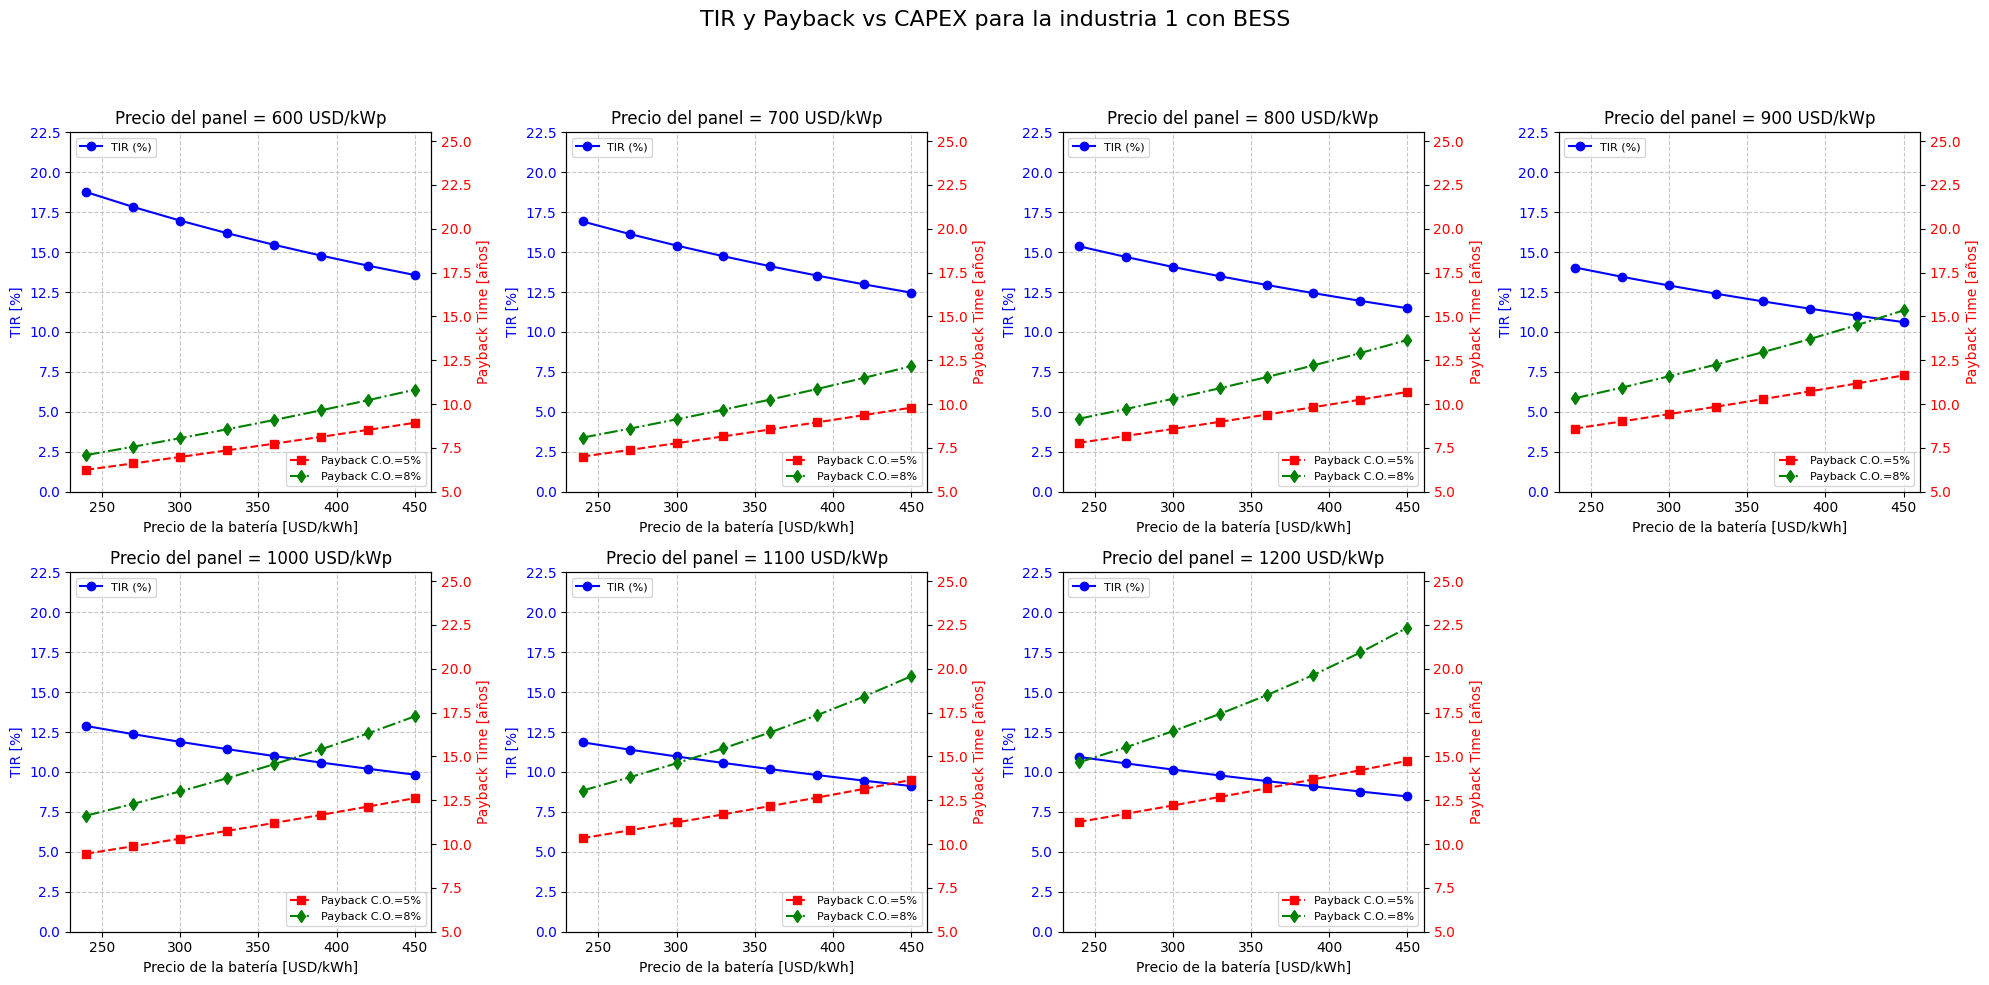

In [ ]:
# Parámetros iniciales y configuración de variaciones
precio_p_min = 600
precio_p_max = 1200
step_p = 100

precio_b_min = 240
precio_b_max = 450
step_b = 30

segunda_variable = 41298.25


# Lista para almacenar resultados
resultados = []

# Iterar sobre todas las combinaciones de precio_p y precio_b
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    for precio_b in range(precio_b_min, precio_b_max + 1, step_b):
        primer_variable = -(220 * precio_p + 355 * precio_b)

        # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
        flujos = [primer_variable] + [segunda_variable] * 25

        # Calcular la TIR
        tir = npf.irr(flujos)
        tir_porcentaje = round(tir * 100, 5)

        # Calcular VPN
        flujo_inicial = flujos[0]
        vpn_total = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
        vpn_total2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

        # Calcular Payback Time
        payback = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento)
        payback2 = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento2)

        # Guardar resultados en la lista
        resultados.append({
            "Precio_P": precio_p,
            "Precio_B": precio_b,
            "TIR (%)": tir_porcentaje,
            "VPN (5%)": round(vpn_total, 2),
            "Payback (5%)": round(payback, 4),
            "VPN (8%)": round(vpn_total2, 2),
            "Payback (8%)": round(payback2, 4)
        })

#Mostrar los resultados en una tabla con Pandas
df_resultados = pd.DataFrame(resultados)
'''
print("\nResultados en formato de tabla:\n")
print(df_resultados.to_string(index=False))  # Muestra la tabla sin índice'''

# Opcional: Guardar resultados en un archivo CSV
df_resultados.to_csv("resultados_Ind1_BESS.csv", index=False)
print("\nResultados guardados en 'resultados_Ind1_BESS.csv'")

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind1_BESS.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind1_BESS.xlsx'")

# Crear una lista de valores únicos de precio_p
valores_precio_p = sorted(df_resultados["Precio_P"].unique())

# Configurar la figura con subplots en dos filas (4 columnas por fila, asumiendo 7 subplots)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Aplanar los ejes para iterar fácilmente (el último subplot estará vacío si hay menos de 8 gráficos)
axes = axes.flatten()

# Iterar sobre cada valor de Precio_P y su respectivo subplot
for i, precio_p in enumerate(valores_precio_p):
    ax1 = axes[i]

    # Filtrar los datos para el Precio_P actual
    data_filtrada = df_resultados[df_resultados["Precio_P"] == precio_p]


    # Graficar TIR (%) en el eje Y izquierdo
    ax1.plot(
        data_filtrada["Precio_B"],
        data_filtrada["TIR (%)"],
        marker='o', linestyle='-', color='b', label='TIR (%)'
    )
    ax1.set_title(f"Precio del panel = {precio_p} USD/kWp", fontsize=12)
    ax1.set_xlabel("Precio de la batería [USD/kWh]", fontsize=10)
    ax1.set_ylabel("TIR [%]", color='b', fontsize=10)
    ax1.set_ylim(0, 22.5)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.tick_params(axis='x', labelbottom=True)

    # Crear un segundo eje Y para Payback Time
    ax2 = ax1.twinx()
    ax2.plot(
        data_filtrada["Precio_B"],
        data_filtrada["Payback (5%)"],
        marker='s', linestyle='--', color='r', label='Payback C.O.=5%'
    )
    ax2.plot(
        data_filtrada["Precio_B"],
        data_filtrada["Payback (8%)"],
        marker='d', linestyle='-.', color='g', label='Payback C.O.=8%'
    )
    ax2.set_ylabel("Payback Time [años]", color='r', fontsize=10)
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(5, 25.5)  # Fijar límite máximo de 10 años para el eje derecho

    # Mostrar las leyendas
    ax1.legend(loc="upper left", fontsize=8)
    ax2.legend(loc="lower right", fontsize=8)

# Eliminar cualquier subplot vacío
for j in range(len(valores_precio_p), len(axes)):
    fig.delaxes(axes[j])

# Configurar el título general de la figura
fig.suptitle("TIR y Payback vs CAPEX para la industria 1 con BESS", fontsize=16)

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Reservar espacio para el título general

# Mostrar la gráfica
plt.show()


#Ind2


Resultados guardados en 'resultados_Ind2_BESS.csv'

Resultados guardados en 'resultados_Ind2_BESS.xlsx'


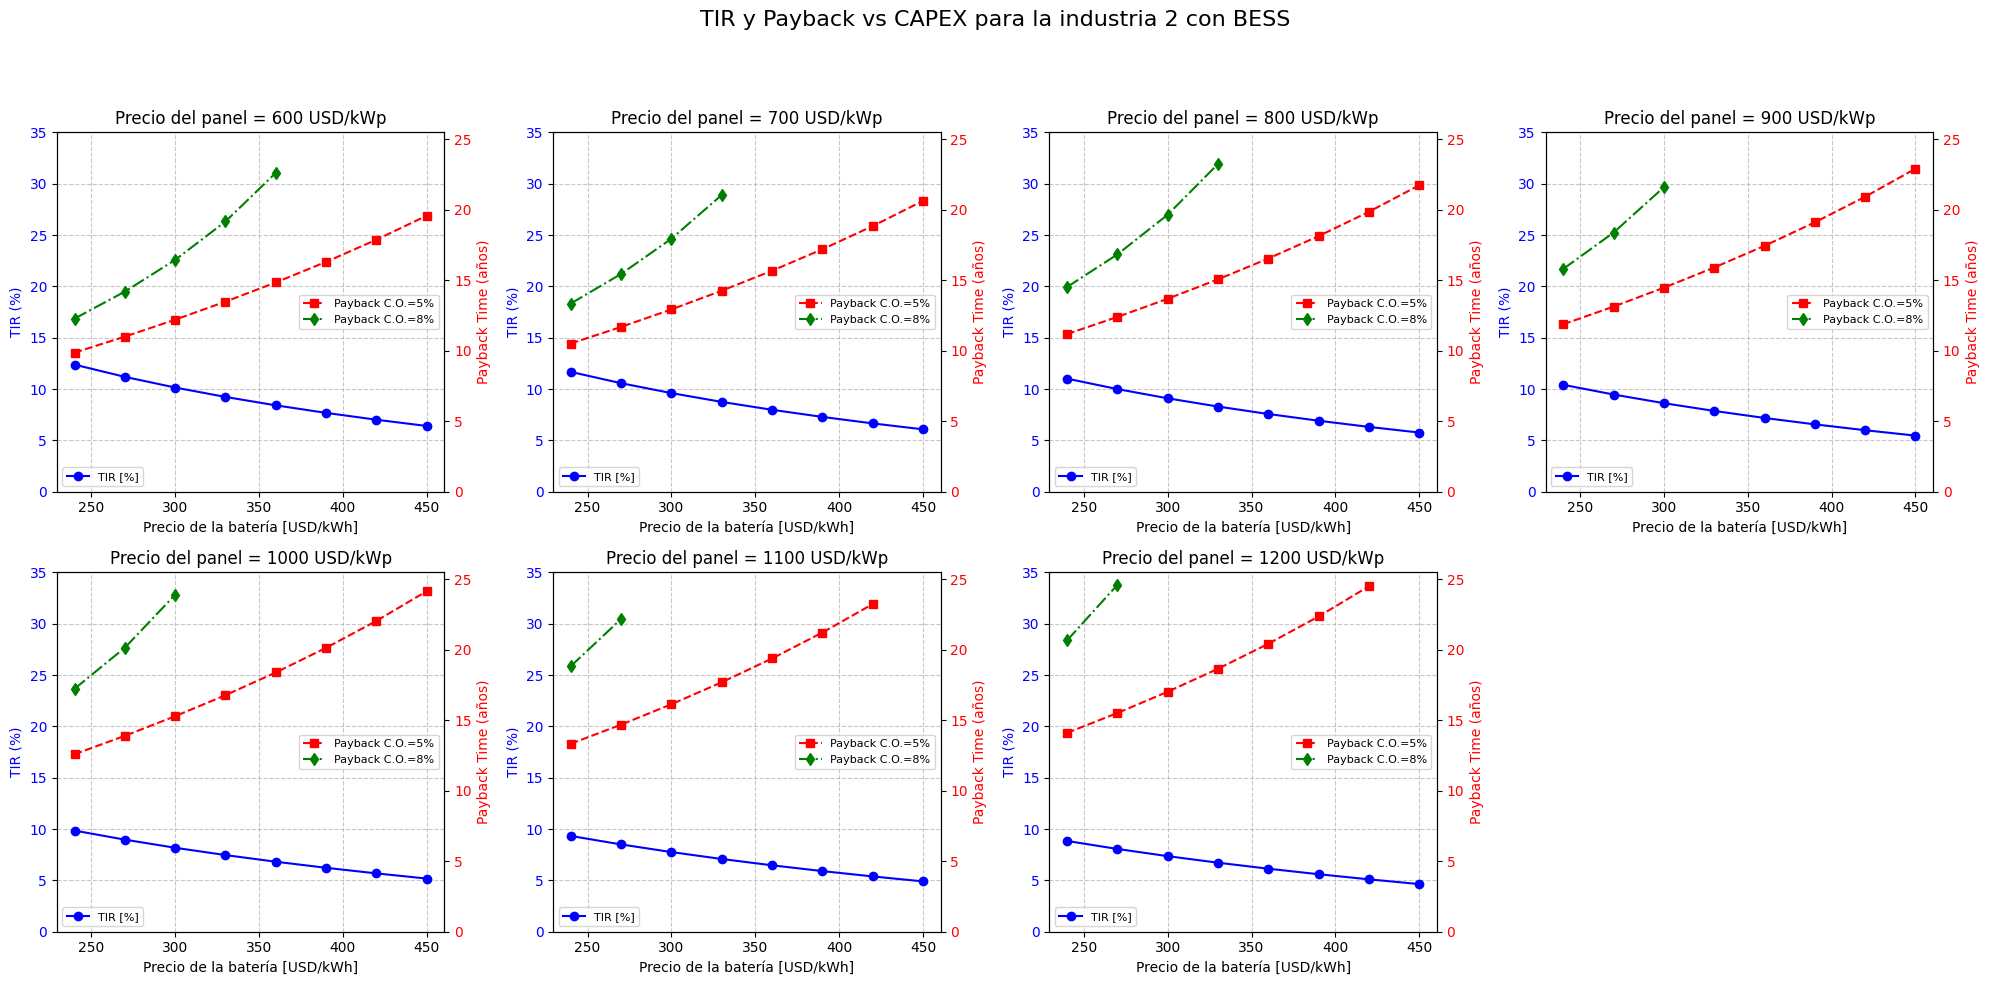

In [ ]:
# Parámetros iniciales y configuración de variaciones
precio_p_min = 600
precio_p_max = 1200
step_p = 100

precio_b_min = 240
precio_b_max = 450
step_b = 30

segunda_variable = 136372.5726

# Lista para almacenar resultados
resultados = []

# Iterar sobre todas las combinaciones de precio_p y precio_b
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    for precio_b in range(precio_b_min, precio_b_max + 1, step_b):
        primer_variable = -(525 * precio_p + 3030 * precio_b)

        # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
        flujos = [primer_variable] + [segunda_variable] * 25

        # Calcular la TIR
        tir = npf.irr(flujos)
        tir_porcentaje = round(tir * 100, 5)

        # Calcular VPN
        flujo_inicial = flujos[0]
        vpn_total_2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
        vpn_total2_2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

        # Calcular Payback Time
        payback_2 = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento)
        payback2_2 = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento2)

        # Guardar resultados en la lista
        resultados.append({
            "Precio_P": precio_p,
            "Precio_B": precio_b,
            "TIR (%)": tir_porcentaje,
            "VPN (5%)": round(vpn_total_2, 2),
            "Payback (5%)": round(payback_2, 4)if payback_2 is not None else None,
            "VPN (8%)": round(vpn_total2_2, 2),
            "Payback (8%)": round(payback2_2, 4) if payback2_2 is not None else None
        })

# Mostrar los resultados en una tabla con Pandas
df_resultados = pd.DataFrame(resultados)
'''
print("\nResultados en formato de tabla:\n")
print(df_resultados.to_string(index=False))  # Muestra la tabla sin índice'''

# Opcional: Guardar resultados en un archivo CSV
df_resultados.to_csv("resultados_Ind2_BESS.csv", index=False)
print("\nResultados guardados en 'resultados_Ind2_BESS.csv'")

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind2_BESS.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind2_BESS.xlsx'")

# Crear una lista de valores únicos de precio_p
valores_precio_p = sorted(df_resultados["Precio_P"].unique())

# Configurar la figura con subplots en dos filas (4 columnas por fila, asumiendo 7 subplots)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Aplanar los ejes para iterar fácilmente (el último subplot estará vacío si hay menos de 8 gráficos)
axes = axes.flatten()

# Iterar sobre cada valor de Precio_P y su respectivo subplot
for i, precio_p in enumerate(valores_precio_p):
    ax1 = axes[i]

        # Filtrar los datos para el Precio_P actual
    data_filtrada = df_resultados[df_resultados["Precio_P"] == precio_p].copy()

    # Crear una copia filtrada con la restricción de Payback <= 25
    data_filtrada_grafica = data_filtrada.copy()
    data_filtrada_grafica["Payback (5%)"] = data_filtrada_grafica["Payback (5%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )
    data_filtrada_grafica["Payback (8%)"] = data_filtrada_grafica["Payback (8%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # Graficar TIR (%) en el eje Y izquierdo
    ax1.plot(
        data_filtrada["Precio_B"],
        data_filtrada["TIR (%)"],
        marker='o', linestyle='-', color='b', label='TIR [%]'
    )
    ax1.set_title(f"Precio del panel = {precio_p} USD/kWp", fontsize=12)
    ax1.set_xlabel("Precio de la batería [USD/kWh]", fontsize=10)
    ax1.set_ylabel("TIR (%)", color='b', fontsize=10)
    ax1.set_ylim(0, 35)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.tick_params(axis='x', labelbottom=True)

    # Crear un segundo eje Y para Payback Time
    ax2 = ax1.twinx()
    ax2.plot(
        data_filtrada_grafica["Precio_B"],
        data_filtrada_grafica["Payback (5%)"],
        marker='s', linestyle='--', color='r', label='Payback C.O.=5%'
    )
    ax2.plot(
        data_filtrada_grafica["Precio_B"],
        data_filtrada_grafica["Payback (8%)"],
        marker='d', linestyle='-.', color='g', label='Payback C.O.=8%'
    )
    ax2.set_ylabel("Payback Time (años)", color='r', fontsize=10)
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(0, 25.5)  # Fijar límite máximo de 30 años para el eje derecho

    # Mostrar las leyendas
    ax1.legend(loc="lower left", fontsize=8)
    ax2.legend(loc="center right", fontsize=8)

# Eliminar cualquier subplot vacío
for j in range(len(valores_precio_p), len(axes)):
    fig.delaxes(axes[j])

# Configurar el título general de la figura
fig.suptitle("TIR y Payback vs CAPEX para la industria 2 con BESS", fontsize=16)

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Reservar espacio para el título general

# Mostrar la gráfica
plt.show()